### I have chosen to implement in Python as it is has good libraries for data analysis and it is well supported in the community

#### Importing libraries

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy
import numpy as np
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
import seaborn as sns

#### Read data

In [5]:
url = "http://www.fifeweather.co.uk/cowdenbeath/200606.csv"

In [6]:
data = pd.read_csv(url)

In [7]:
#data.dtypes

In [8]:
#data.describe()

In [9]:
#data.head()

In [10]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")

In [11]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time

In [12]:
data = data[(data['Date'].dt.month == 6)]

In [13]:
df_Q123 = data[['Date', 'Time', 'Outside Temperature', 'Hi Temperature', 'Low Temperature']]

In [14]:
df_Q123.head()

,Date,Time,Outside Temperature,Hi Temperature,Low Temperature
90,2006-06-01,00:00:00,9.6,9.6,9.5
91,2006-06-01,00:10:00,9.5,9.6,9.5
92,2006-06-01,00:20:00,9.5,9.6,9.5
93,2006-06-01,00:30:00,9.5,9.6,9.5
94,2006-06-01,00:40:00,9.5,9.6,9.5


In [15]:
days = data['Date'].dt.day.unique()
dfs = []
i=0
for df in days:
    df = df_Q123[df_Q123['Date'].dt.day == i+1]
    dfs.append(df)
    i+=1

In [16]:
dfs[25].head()

,Date,Time,Outside Temperature,Hi Temperature,Low Temperature
3689,2006-06-26,00:00:00,9.9,10.0,9.8
3690,2006-06-26,00:10:00,9.9,10.0,9.8
3691,2006-06-26,00:20:00,9.9,10.0,9.8
3692,2006-06-26,00:30:00,9.9,10.0,9.8
3693,2006-06-26,00:40:00,9.8,9.9,9.7


In [17]:
values = []
for df in dfs:
    values.append(df['Outside Temperature'].max())
print values

[17.199999999999999, 17.699999999999999, 19.600000000000001, 18.0, 16.100000000000001, 23.199999999999999, 19.600000000000001, 20.699999999999999, 17.899999999999999, 19.899999999999999, 22.399999999999999, 19.399999999999999, 17.100000000000001, 16.399999999999999, 21.100000000000001, 18.699999999999999, 18.899999999999999, 15.4, 17.300000000000001, 16.300000000000001, 12.6, 16.100000000000001, 16.5, 16.699999999999999, 15.6, 15.800000000000001, 17.699999999999999, 21.399999999999999, 18.100000000000001, 15.9]


In [18]:
index_max = max(xrange(len(values)), key=values.__getitem__)

In [19]:
dfs[index_max].head()

,Date,Time,Outside Temperature,Hi Temperature,Low Temperature
810,2006-06-06,00:00:00,10.3,10.4,10.3
811,2006-06-06,00:10:00,10.2,10.3,10.2
812,2006-06-06,00:20:00,10.1,10.2,10.1
813,2006-06-06,00:30:00,10.1,10.1,10.0
814,2006-06-06,00:40:00,9.9,10.0,9.8


In [20]:
dfs[index_max][dfs[index_max]['Outside Temperature'] == dfs[index_max]['Outside Temperature'].max()]

,Date,Time,Outside Temperature,Hi Temperature,Low Temperature
896,2006-06-06,14:20:00,23.2,23.2,23.1


In [21]:
dfs[index_max]['Time'][dfs[index_max]['Outside Temperature'] == dfs[index_max]['Outside Temperature'].max()]

896    14:20:00
Name: Time, dtype: object

## Question 1a output

In [22]:
dfs[index_max]['Time'][dfs[index_max]['Outside Temperature'] == dfs[index_max]['Outside Temperature'].max()].values[0]

datetime.time(14, 20)

In [23]:
times=[]
for df in dfs:
    times.append(df['Time'][df['Outside Temperature'] == df['Outside Temperature'].max()].values[0])
    
    
print times    

[datetime.time(15, 0), datetime.time(13, 20), datetime.time(14, 50), datetime.time(16, 10), datetime.time(13, 30), datetime.time(14, 20), datetime.time(13, 0), datetime.time(16, 20), datetime.time(14, 40), datetime.time(13, 0), datetime.time(11, 0), datetime.time(15, 0), datetime.time(13, 40), datetime.time(11, 10), datetime.time(13, 50), datetime.time(14, 50), datetime.time(14, 50), datetime.time(13, 20), datetime.time(14, 50), datetime.time(12, 0), datetime.time(13, 30), datetime.time(14, 40), datetime.time(10, 10), datetime.time(15, 40), datetime.time(10, 20), datetime.time(10, 0), datetime.time(12, 40), datetime.time(10, 40), datetime.time(13, 0), datetime.time(13, 0)]


In [24]:
df_times = pd.DataFrame(times, columns=['Time of daily highs'])

In [25]:
df_times.head()
#df_times.describe()

,Time of daily highs
0,15:00:00
1,13:20:00
2,14:50:00
3,16:10:00
4,13:30:00


In [26]:
df_times['Time of daily highs'].value_counts().max()

4

## Question 1b output

In [27]:
df_times['Time of daily highs'].value_counts().idxmax()

datetime.time(13, 0)

In [28]:
df_Q1_3 = df_Q123.set_index('Time')

## Question 1c output

In [29]:
df_Q1_3.groupby('Date')['Outside Temperature'].nlargest(10)

Date        Time    
2006-06-01  15:00:00    17.2
            15:10:00    17.2
            14:50:00    17.1
            15:20:00    17.0
            15:30:00    16.8
            14:40:00    16.7
            13:40:00    16.6
            13:50:00    16.6
            15:40:00    16.6
            13:30:00    16.3
2006-06-02  13:20:00    17.7
            13:30:00    17.6
            13:10:00    17.5
            13:40:00    17.4
            13:50:00    17.4
            14:00:00    17.4
            14:10:00    17.4
            14:20:00    17.4
            14:30:00    17.3
            11:50:00    17.2
2006-06-03  14:50:00    19.6
            15:00:00    19.6
            14:40:00    19.5
            15:10:00    19.4
            15:20:00    19.4
            14:30:00    19.3
            15:30:00    19.2
            14:20:00    19.1
            15:40:00    19.1
            15:50:00    19.0
                        ... 
2006-06-28  10:40:00    21.4
            10:50:00    21.4
            10:30:00  

## Question 2

In [30]:
df_low_temp = df_Q123[['Date', 'Time', 'Low Temperature']]

In [31]:
df_hi_temp = df_Q123[['Date', 'Time', 'Hi Temperature']]

In [32]:
#df_low_temp.head()
#df_hi_temp.head()

In [33]:
low_temps = []
i=0
for df in range(0,9):
    df = df_low_temp[df_low_temp['Date'].dt.day == i+1]
    low_temps.append(df)
    i+=1

In [34]:
low_temps[3].head()

,Date,Time,Low Temperature
522,2006-06-04,00:00:00,8.8
523,2006-06-04,00:10:00,8.7
524,2006-06-04,00:20:00,8.6
525,2006-06-04,00:30:00,8.4
526,2006-06-04,00:40:00,8.2


In [35]:
for x in range(0,9):
        low_temps[x] = low_temps[x].drop(low_temps[x][(low_temps[x]['Low Temperature'] < 10.28) 
                                                      | (low_temps[x]['Low Temperature'] > 10.32)].index)
        print low_temps[x].head(1)

          Date      Time  Low Temperature
127 2006-06-01  06:10:00             10.3
Empty DataFrame
Columns: [Date, Time, Low Temperature]
Index: []
          Date      Time  Low Temperature
420 2006-06-03  07:00:00             10.3
          Date      Time  Low Temperature
659 2006-06-04  22:50:00             10.3
Empty DataFrame
Columns: [Date, Time, Low Temperature]
Index: []
          Date      Time  Low Temperature
810 2006-06-06  00:00:00             10.3
           Date      Time  Low Temperature
1081 2006-06-07  21:10:00             10.3
           Date      Time  Low Temperature
1128 2006-06-08  05:00:00             10.3
           Date      Time  Low Temperature
1260 2006-06-09  03:00:00             10.3


In [36]:
hi_temps = []
i=0
for df in range(0,9):
    df = df_hi_temp[df_hi_temp['Date'].dt.day == i+1]
    hi_temps.append(df)
    i+=1

In [37]:
for x in xrange(0,9):
        hi_temps[x] = hi_temps[x].drop(hi_temps[x][(hi_temps[x]['Hi Temperature'] < 21.3)
                                                               | (hi_temps[x]['Hi Temperature'] > 23.3)].index)
        print hi_temps[x].head(5)

Empty DataFrame
Columns: [Date, Time, Hi Temperature]
Index: []
Empty DataFrame
Columns: [Date, Time, Hi Temperature]
Index: []
Empty DataFrame
Columns: [Date, Time, Hi Temperature]
Index: []
Empty DataFrame
Columns: [Date, Time, Hi Temperature]
Index: []
Empty DataFrame
Columns: [Date, Time, Hi Temperature]
Index: []
          Date      Time  Hi Temperature
885 2006-06-06  12:30:00            21.4
886 2006-06-06  12:40:00            21.6
887 2006-06-06  12:50:00            21.8
888 2006-06-06  13:00:00            22.1
889 2006-06-06  13:10:00            22.4
Empty DataFrame
Columns: [Date, Time, Hi Temperature]
Index: []
Empty DataFrame
Columns: [Date, Time, Hi Temperature]
Index: []
Empty DataFrame
Columns: [Date, Time, Hi Temperature]
Index: []


In [38]:
df_low_temps = pd.concat(low_temps)

In [39]:
df_hi_temps = pd.concat(hi_temps)

In [40]:
df_low_temps.describe()
#df_low_temps.head()

,Low Temperature
count,14.0
mean,10.3
std,0.0
min,10.3
25%,10.3
50%,10.3
75%,10.3
max,10.3


In [41]:
#df_hi_temps.describe()
df_hi_temps.head()

,Date,Time,Hi Temperature
885,2006-06-06,12:30:00,21.4
886,2006-06-06,12:40:00,21.6
887,2006-06-06,12:50:00,21.8
888,2006-06-06,13:00:00,22.1
889,2006-06-06,13:10:00,22.4


In [42]:
Q2 = pd.merge(df_low_temps, df_hi_temps, how='left', on=['Date'])

## Question 2 output

In [43]:
Q2

,Date,Time_x,Low Temperature,Time_y,Hi Temperature
0,2006-06-01,06:10:00,10.3,NaN,NaN
1,2006-06-01,21:50:00,10.3,NaN,NaN
2,2006-06-03,07:00:00,10.3,NaN,NaN
3,2006-06-03,21:00:00,10.3,NaN,NaN
4,2006-06-04,22:50:00,10.3,NaN,NaN
5,2006-06-04,23:00:00,10.3,NaN,NaN
6,2006-06-06,00:00:00,10.3,12:30:00,21.4
7,2006-06-06,00:00:00,10.3,12:40:00,21.6
8,2006-06-06,00:00:00,10.3,12:50:00,21.8
9,2006-06-06,00:00:00,10.3,13:00:00,22.1


## Question 3

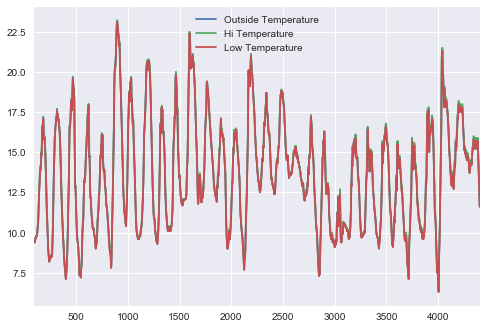

In [44]:
df_Q123.plot()

In [ ]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
lag_plot(series)
pyplot.show()